In [1]:
 # This is a code cell
import numpy as np

from matplotlib.pyplot import Axes, tight_layout, subplots_adjust, suptitle, plot, subplot, axes, minorticks_on, xlabel, ylabel, legend, title, rc, figure, axvline, axhline, axvline, annotate, text, annotate, xticks 


import matplotlib.pyplot as plt

from scipy.integrate import quad, nquad
from scipy import integrate


from matplotlib import pyplot as plt 


from scipy.fft import fft, fftfreq

from mpl_toolkits import mplot3d
from scipy import fft
from scipy.special import kn

import sympy as sy


In [29]:
N=50

w0=1.32*10**14
wa=0.8*w0
wc=1.75*10**14
gamma0=4.28*10**13


#Normalization

w0_n=1.32*10**14/wa
wc_n=wc/wa
gamma0_n=gamma0/wa

wa_n=1


Omega=0.001 #units of wa

alpha_n=1 #units of wa


ome=np.linspace(100,1000,N)

time_n=np.linspace(500,505,N) #units of twa
time2_n=np.linspace(500,505,N) #units of twa




#wa=wa/wa
#gamma0=2

In [10]:
def gamma(time,gamma0, alpha):
    return gamma0*(2+np.sin(time*alpha))

def numerator(xi,time2,time,wa,wc,gamma0,alpha):
    return np.exp(-xi*(time-time2))*np.exp(-1j*wa*(time-time2))*xi**4*wc**2*np.sqrt(gamma(time,gamma0,alpha))*np.sqrt(gamma(time2,gamma0,alpha))
    
def deno1(xi,time2,time, w0,wc,gamma0,alpha):
    return np.sqrt(((xi**2+w0**2)**2-gamma(time,gamma0,alpha)**2*xi**2-wc**2*(xi**2+w0**2+gamma(time,gamma0,alpha)*xi))*((xi**2+w0**2)**2-gamma(time2,gamma0,alpha)**2*xi**2))

def deno2(xi,time2,time,w0,wc,gamma0,alpha):
    return np.sqrt(((xi**2+w0**2)**2-gamma(time2,gamma0,alpha)**2*xi**2-wc**2*(xi**2+w0**2-gamma(time2,gamma0,alpha)*xi))*((xi**2+w0**2)**2-gamma(time,gamma0,alpha)**2*xi**2))

def integrand(omega,time2,time,gamma0,alpha,w0,wc,wa):
    return numerator(omega,time2,time,wa,wc,gamma0,alpha)/(deno1(omega,time2,time,gamma0,alpha,w0,wc)+deno2(omega, time2,time,gamma0,alpha,w0,wc))

<ipython-input-10-eb5c599eed59>:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(((xi**2+w0**2)**2-gamma(time,gamma0,alpha)**2*xi**2-wc**2*(xi**2+w0**2-gamma(time,gamma0,alpha)*xi))*((xi**2+w0**2)**2-gamma(time2,gamma0,alpha)**2*xi**2))
<ipython-input-10-eb5c599eed59>:14: RuntimeWarning: invalid value encountered in cdouble_scalars
  return numerator(omega,time2,time,wa,wc,gamma0,alpha)/(deno1(omega,time2,time,gamma0,alpha,w0,wc)+deno2(omega, time2,time,gamma0,alpha,w0,wc))
<ipython-input-10-eb5c599eed59>:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(((xi**2+w0**2)**2-gamma(time2,gamma0,alpha)**2*xi**2-wc**2*(xi**2+w0**2+gamma(time2,gamma0,alpha)*xi))*((xi**2+w0**2)**2-gamma(time,gamma0,alpha)**2*xi**2))


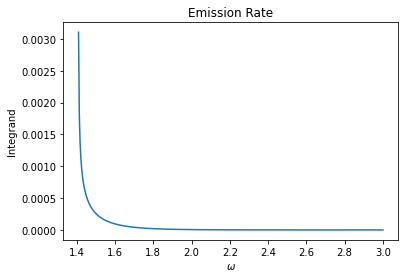

In [27]:
integ=np.zeros(N)

for i in range(len(ome)):
    #print(i)
    integ[i]=np.real(integrand(ome[i], time2_n[94],time_n[100],gamma0_n,alpha_n,w0_n,wc_n,wa_n))

    
plt.plot(ome,integ)
plt.ylabel('Integrand')
plt.xlabel('$\omega$')
plt.title('Emission Rate')
plt.show()


In [22]:
print(w0_n)
print(wc_n)
print(wa_n)
print(gamma0_n)

1.25
1.6571969696969697
1
0.4053030303030303


In [30]:
Int_final_2=[]

for i in range(len(time_n)):
    test,err=nquad(integrand,[[0,np.inf],[0,time_n[i]]],args=(time_n[i],gamma0_n,alpha_n,w0_n,wc_n,wa_n))
    print(i)
    Int_final_2.append(test)
    
#50 ptos -- Integration from  0 to \infty in  t with time variation
plt.plot(time_n,Int_final_2)
plt.ylabel('Beta(t)')
plt.xlabel('t*wa')
plt.title('Emission Rate')
plt.show()

<ipython-input-10-eb5c599eed59>:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(((xi**2+w0**2)**2-gamma(time,gamma0,alpha)**2*xi**2-wc**2*(xi**2+w0**2-gamma(time,gamma0,alpha)*xi))*((xi**2+w0**2)**2-gamma(time2,gamma0,alpha)**2*xi**2))
<ipython-input-10-eb5c599eed59>:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(((xi**2+w0**2)**2-gamma(time2,gamma0,alpha)**2*xi**2-wc**2*(xi**2+w0**2+gamma(time2,gamma0,alpha)*xi))*((xi**2+w0**2)**2-gamma(time,gamma0,alpha)**2*xi**2))
<ipython-input-10-eb5c599eed59>:14: RuntimeWarning: invalid value encountered in cdouble_scalars
  return numerator(omega,time2,time,wa,wc,gamma0,alpha)/(deno1(omega,time2,time,gamma0,alpha,w0,wc)+deno2(omega, time2,time,gamma0,alpha,w0,wc))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


IndexError: index 50 is out of bounds for axis 0 with size 50